<a href="https://colab.research.google.com/github/Samarjeet09/Assignment-2-Sampling/blob/main/Assignement_2_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
!pip install xgboost &> null


In [19]:
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Loading dataset

In [20]:
url = "https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv"
df = pd.read_csv(url,index_col = "Time")
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


0    763
1      9
Name: Class, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

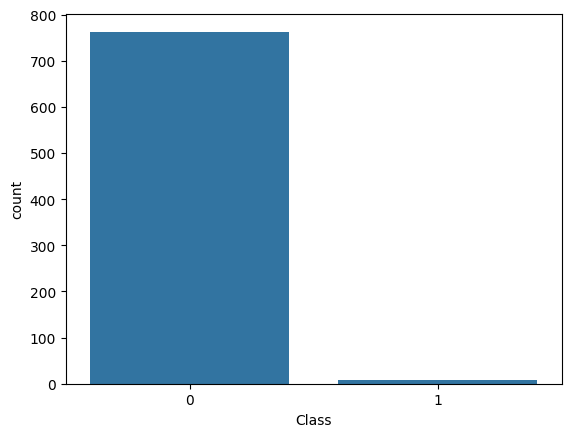

In [21]:
print(df.Class.value_counts())
sns.countplot(x = "Class",data = df)

# Balancing the Dataset

0    763
1    763
Name: Class, dtype: int64


<Axes: xlabel='Class', ylabel='count'>

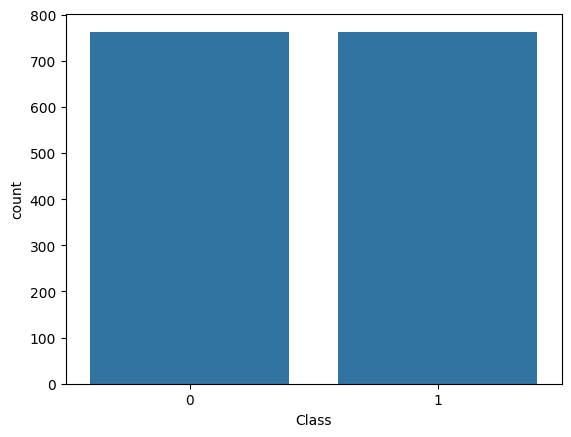

In [22]:
from imblearn.over_sampling import RandomOverSampler
X,y = df.iloc[:,:-1] , df['Class']
sampler = RandomOverSampler()
x_res, y_res = sampler.fit_resample(X, y)

print(y_res.value_counts())
sns.countplot(x = y_res)

# Concatinating The dfs

In [23]:
df_res = pd.concat([x_res,y_res],axis = 1)
df_res.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Fn to evaluate Each Technique

In [24]:
def trainModels(df,name):
    models = {
        'LogisticRegression':LogisticRegression(random_state=42),
        'RandomForestClassifier':RandomForestClassifier(random_state=42),
        'KNeighborsClassifier':KNeighborsClassifier(),
        'DecisionTreeClassifier':DecisionTreeClassifier(random_state=42),
        'XGBClassifier':XGBClassifier(random_state=42),

    }
    X,y = df.iloc[:,:-1] , df['Class']
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    row = dict()
    row['sampling_Technique'] = name
    for  model_name,model in models.items():
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)

        print(f'{model_name} - Accuracy: {accuracy}')
        row[model_name] = accuracy

    return row


In [25]:
row_list = [] # will use it to make the final Df

# Simple Random Sampling

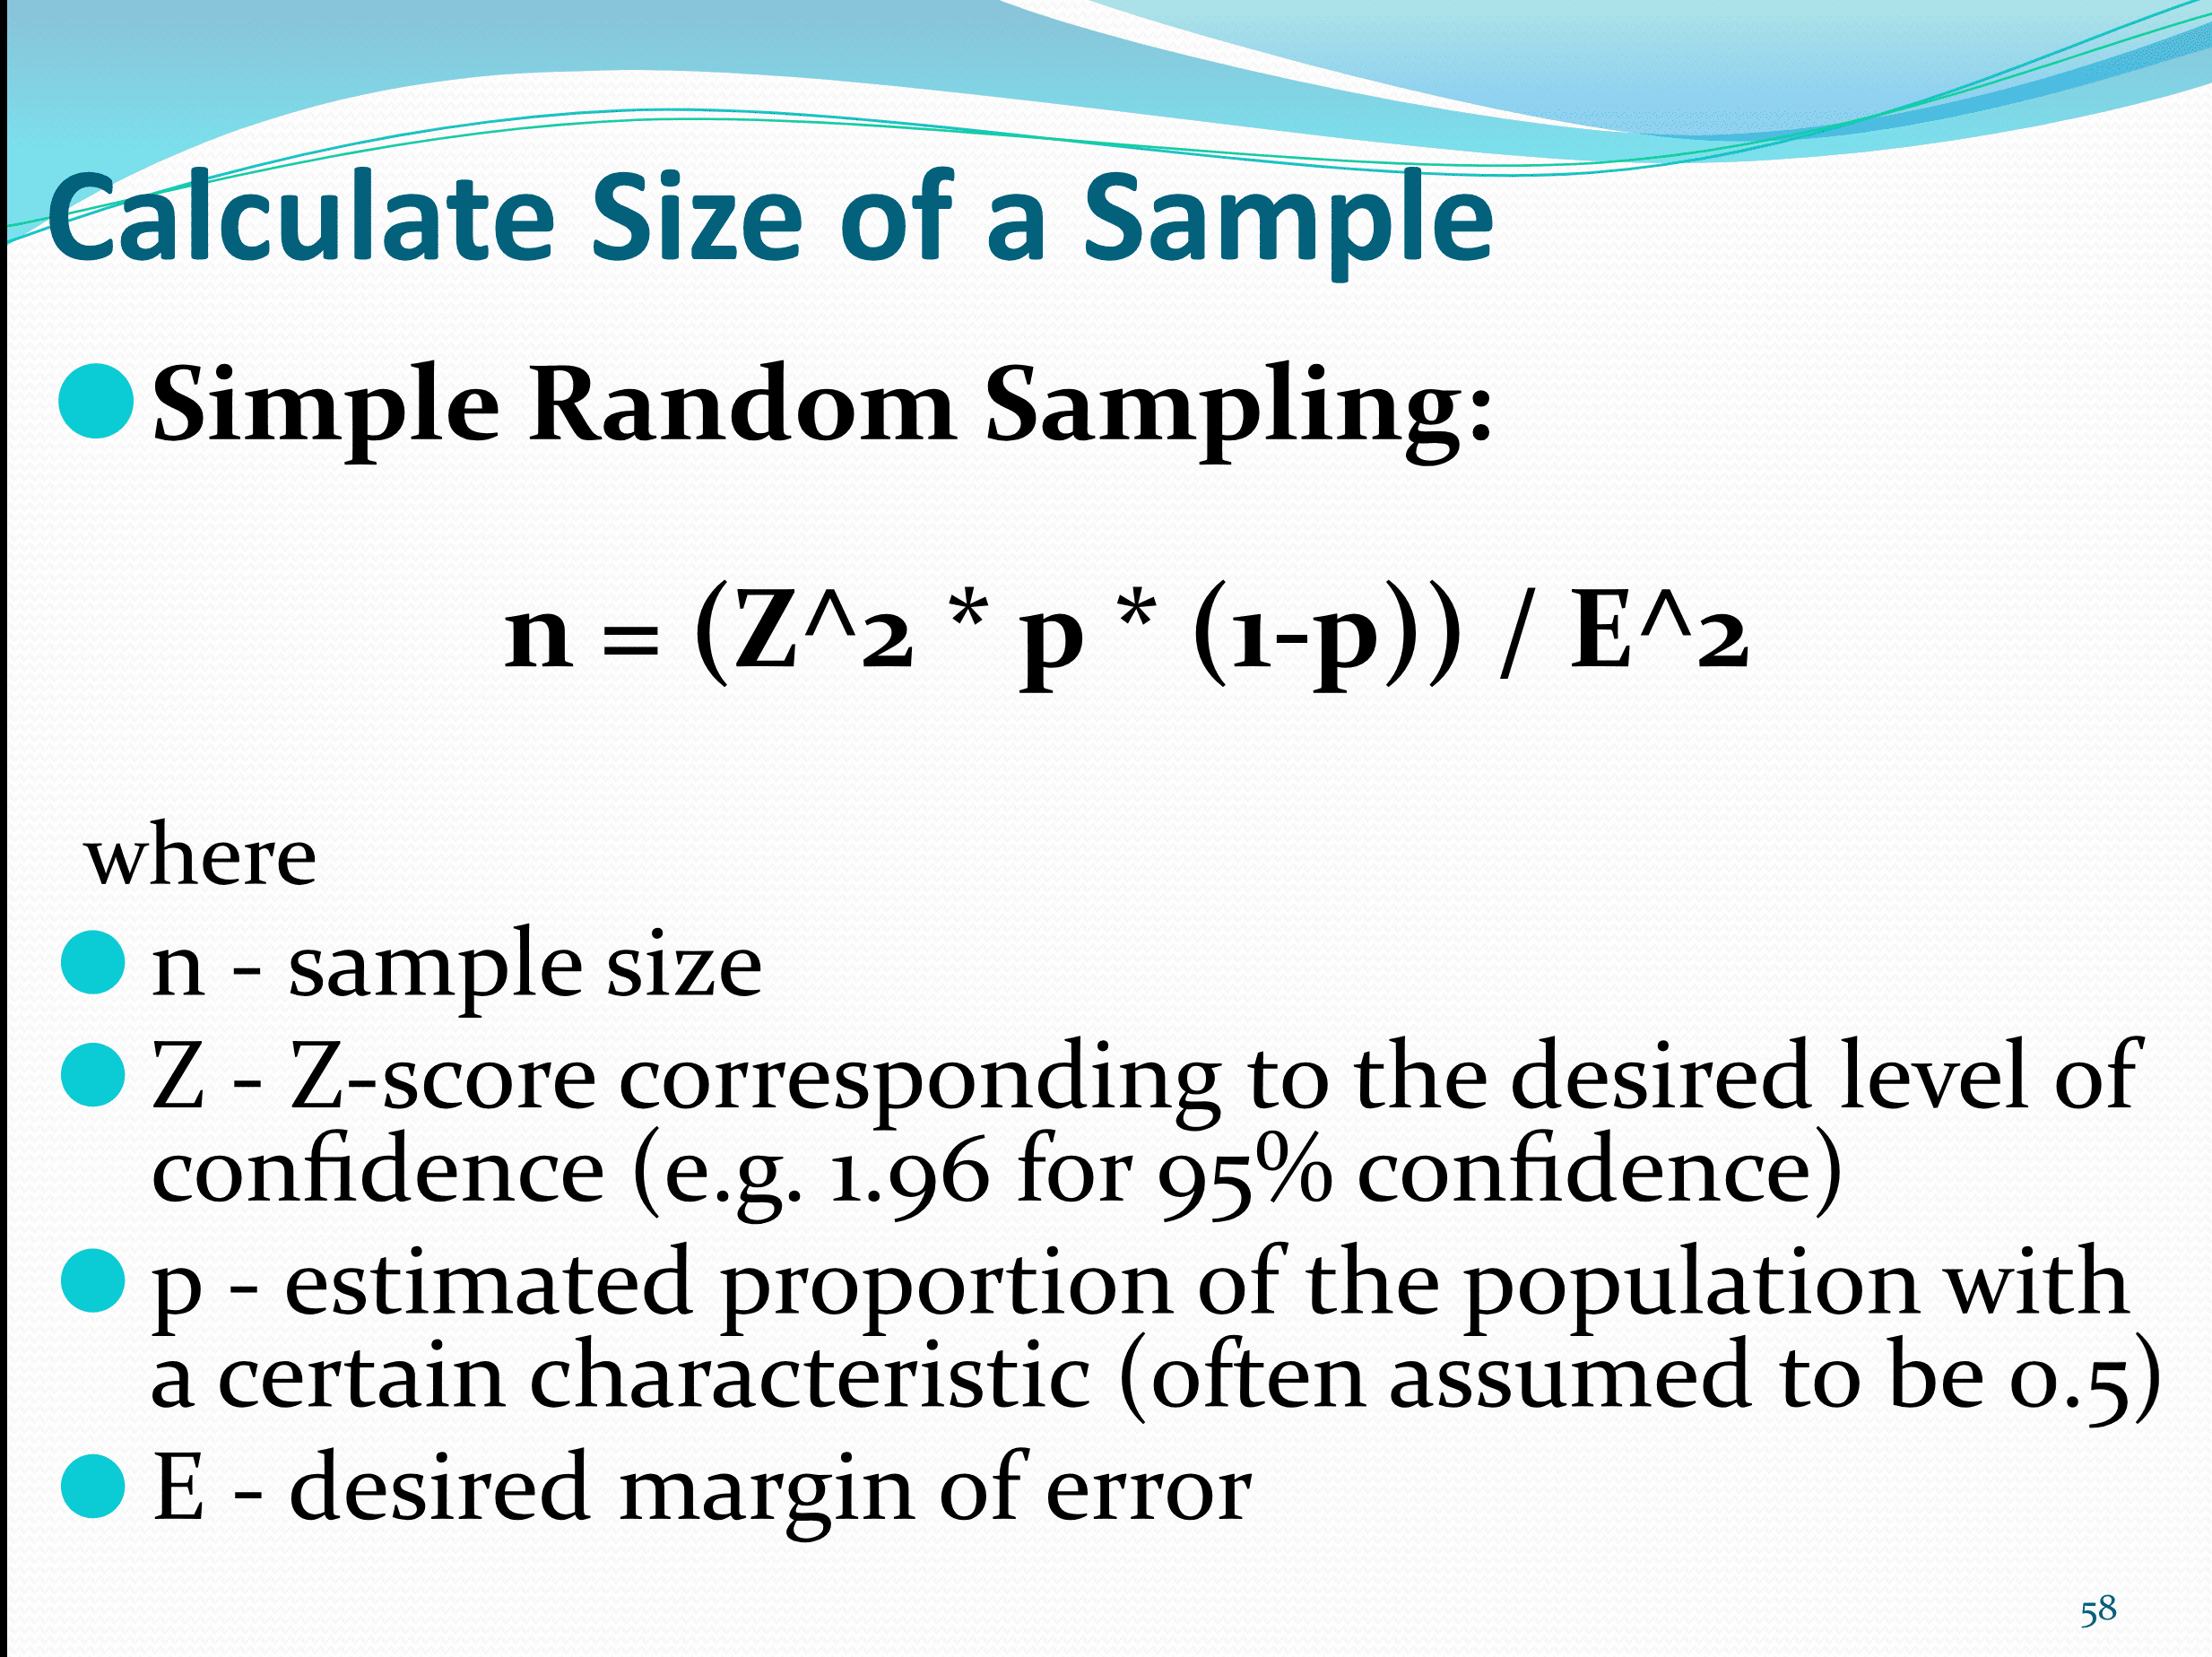

In [26]:
n = int(((1.96**2 )* 0.5*0.5)/(0.05**2))
SimpleSampling = df_res.sample(n=n, random_state=42)
SimpleSampling.shape

(384, 30)

In [27]:
row_list.append(trainModels(SimpleSampling,"Simple Random Sampling"))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression - Accuracy: 0.853448275862069
RandomForestClassifier - Accuracy: 1.0
KNeighborsClassifier - Accuracy: 0.9224137931034483
DecisionTreeClassifier - Accuracy: 0.9741379310344828
XGBClassifier - Accuracy: 0.9568965517241379


# Systematic Sampling

In [28]:
SystematicSampling = df_res.sample(frac=1, random_state=42).reset_index(drop=True)

sampling_interval = 4
SystematicSample = SystematicSampling.iloc[::sampling_interval]
SystematicSample.shape

(382, 30)

In [29]:
row_list.append(trainModels(SystematicSampling,"Systematic Sampling"))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression - Accuracy: 0.9170305676855895
RandomForestClassifier - Accuracy: 1.0
KNeighborsClassifier - Accuracy: 0.9716157205240175
DecisionTreeClassifier - Accuracy: 0.9912663755458515
XGBClassifier - Accuracy: 0.9978165938864629


# Cluster Sampling

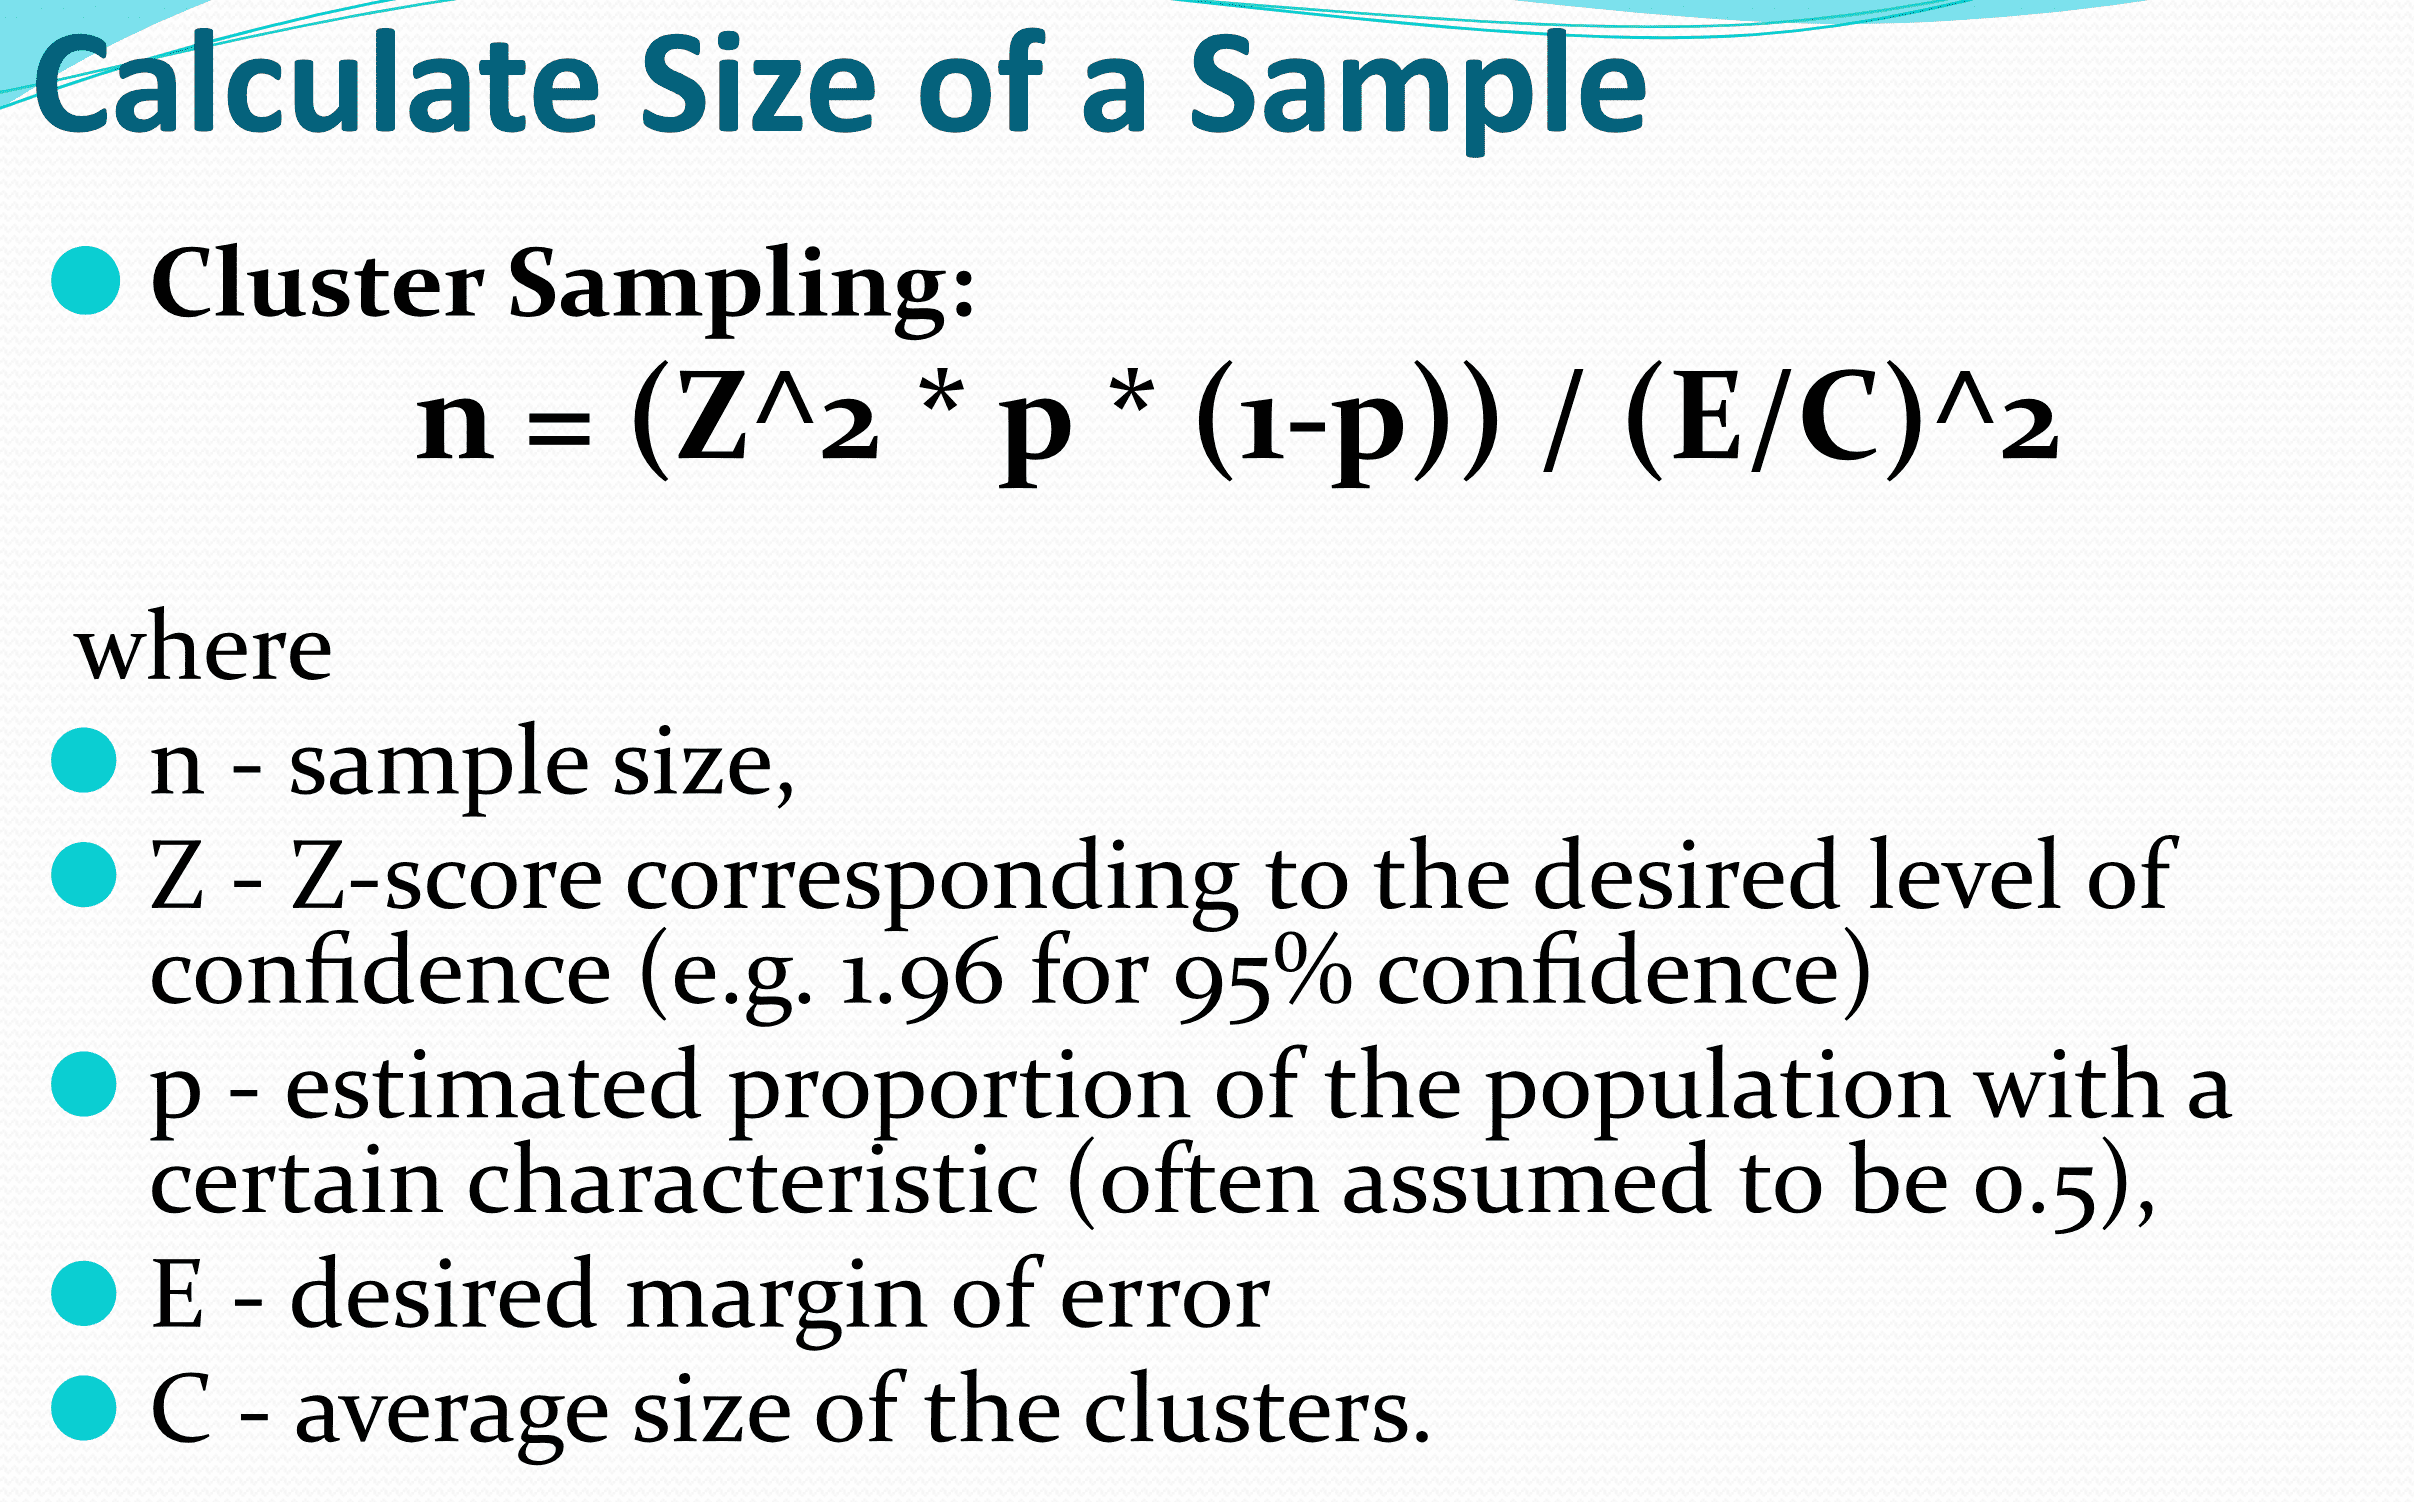

In [32]:
from sklearn.cluster import KMeans
import random
num_clusters = 10

kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=42)

clusters = kmeans.fit_predict(df_res)
clusters = pd.Series(clusters)

selected_clusters = random.sample(range(num_clusters), 3)
ClusterSample = df_res.loc[clusters.isin(selected_clusters)]
print(ClusterSample.shape)

(1141, 30)


In [33]:
row_list.append(trainModels(ClusterSample,"Cluster Sampling"))

LogisticRegression - Accuracy: 0.9533527696793003
RandomForestClassifier - Accuracy: 1.0
KNeighborsClassifier - Accuracy: 0.9737609329446064
DecisionTreeClassifier - Accuracy: 0.9970845481049563
XGBClassifier - Accuracy: 0.9970845481049563


# Stratified Sampling

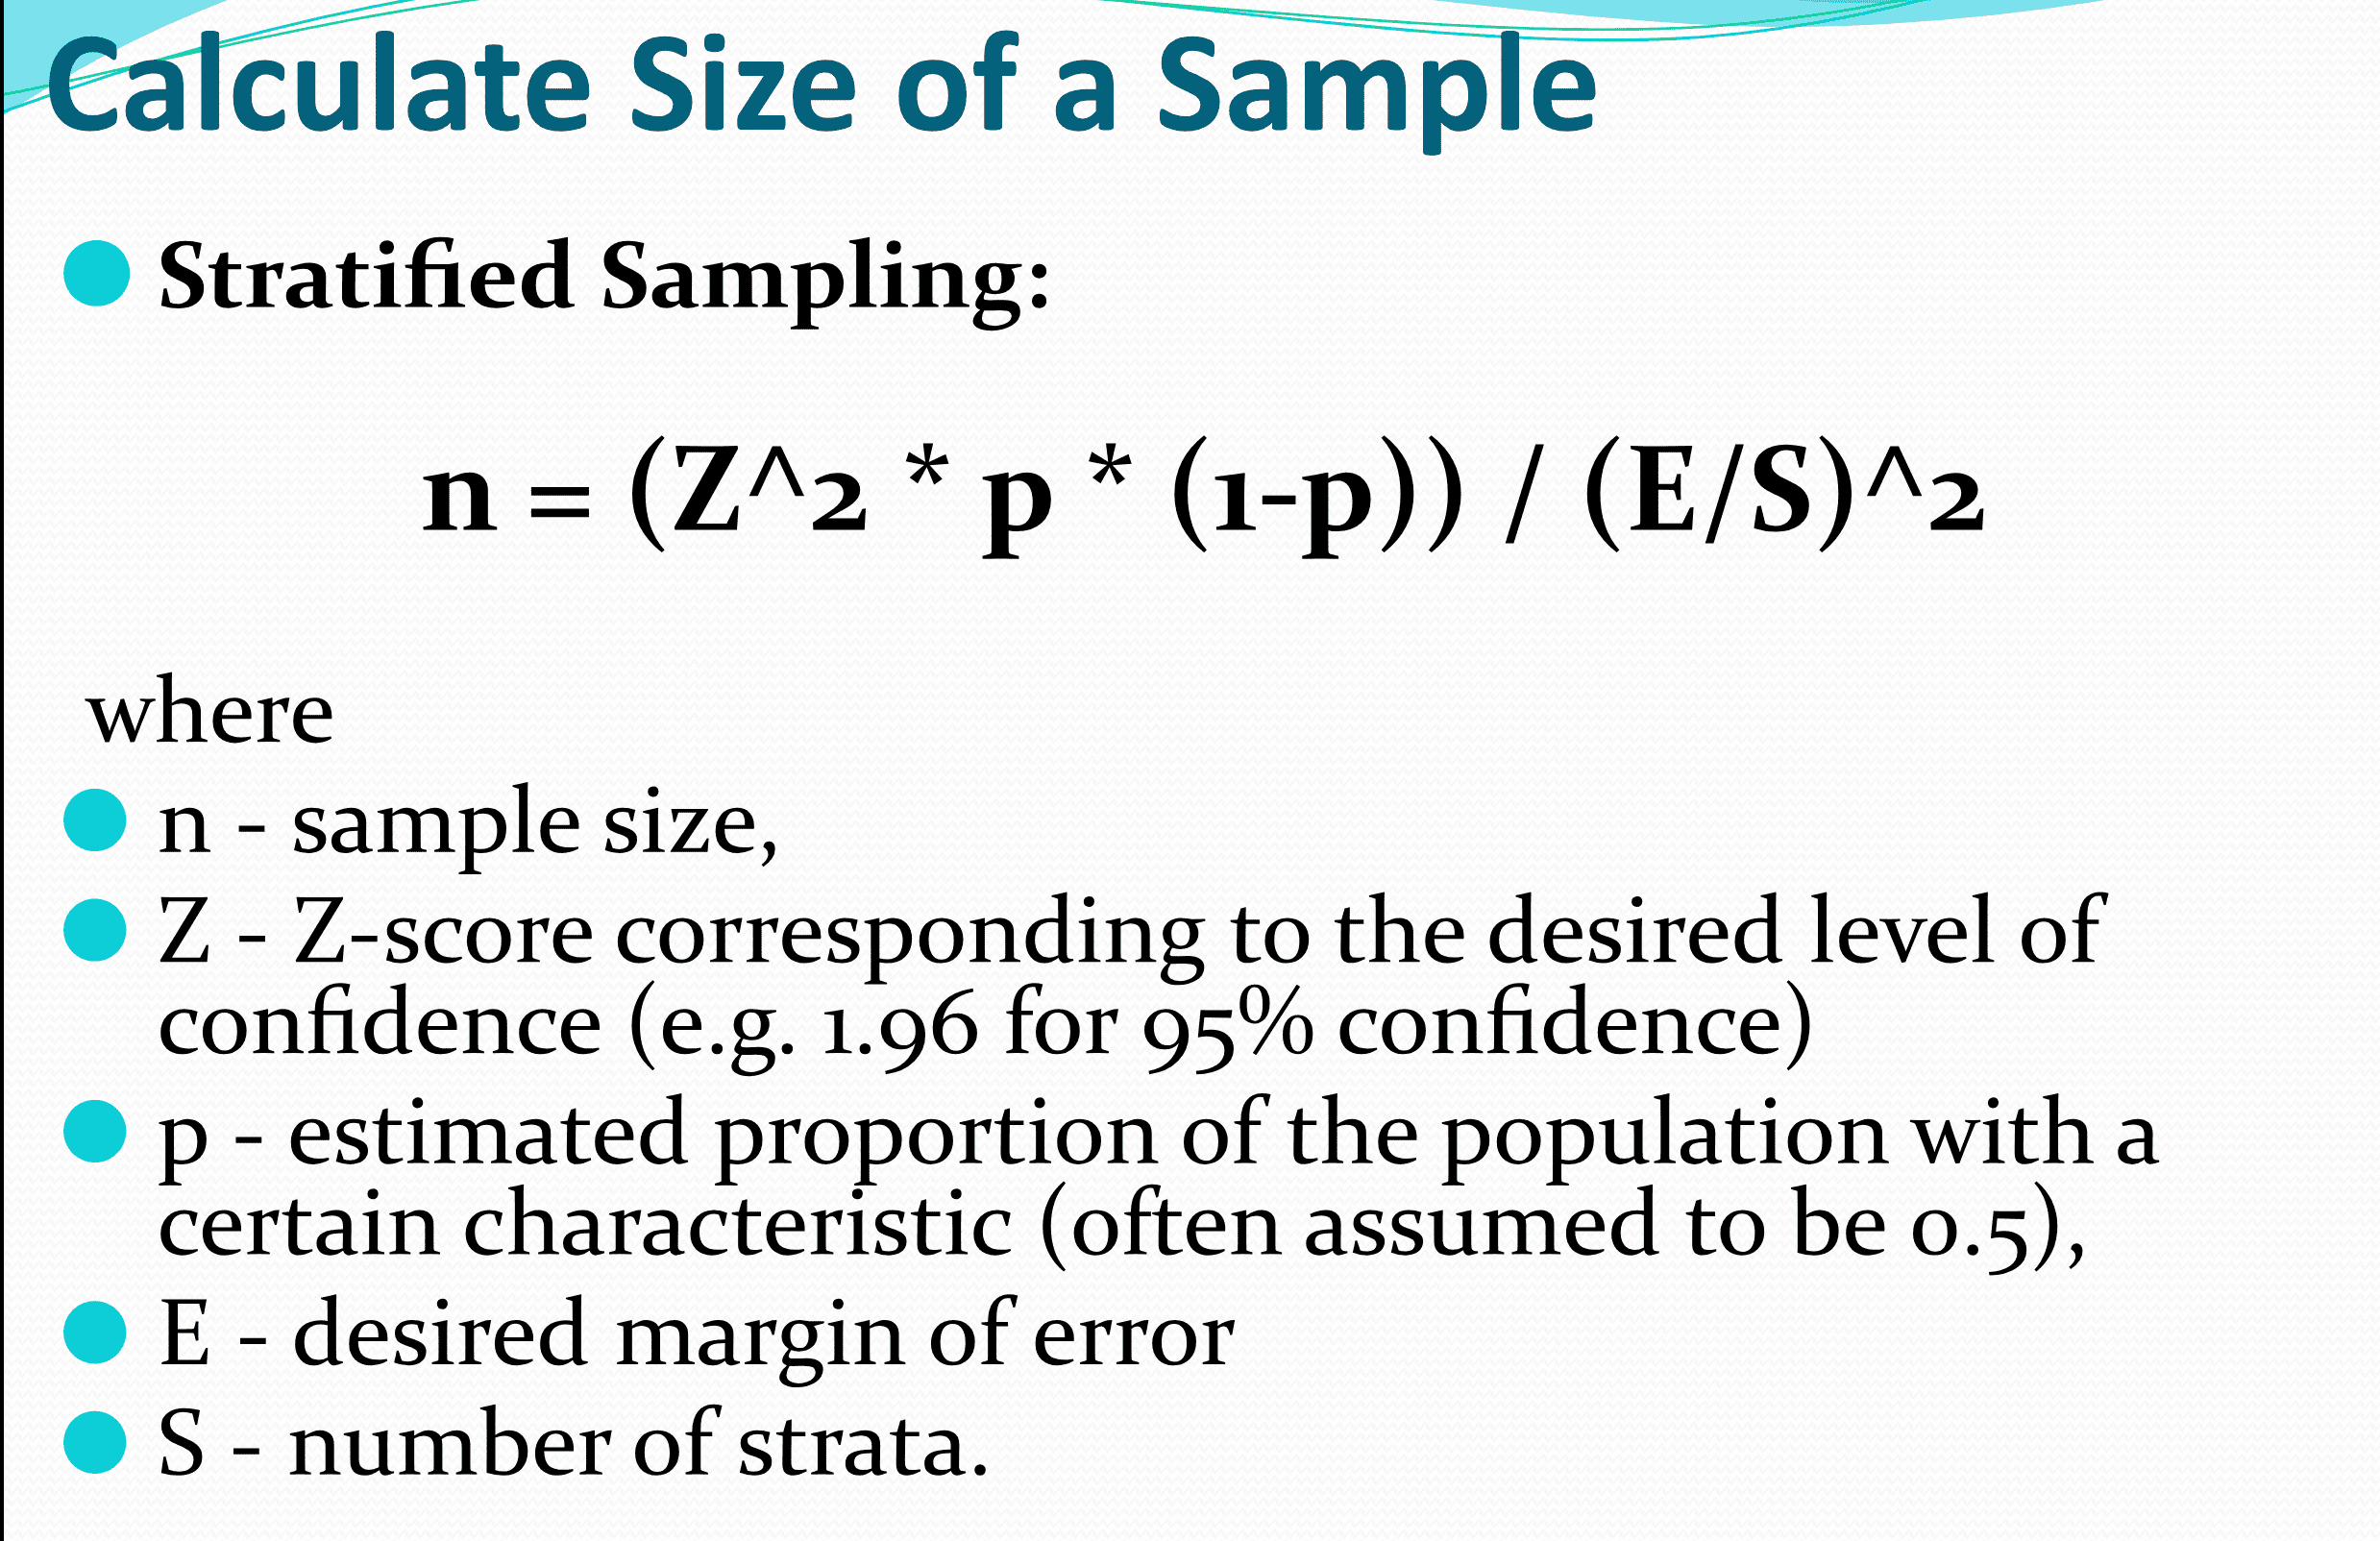

In [34]:
n = int(((1.96**2 )* 0.5*0.5)/(0.05**2))
StratifiedSampling = df_res.groupby('Class')
StratifiedSample=StratifiedSampling.sample(frac= n / len(df_res))
StratifiedSample.shape

(384, 30)

In [35]:
row_list.append(trainModels(StratifiedSample,"Stratified Sampling"))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression - Accuracy: 0.9051724137931034
RandomForestClassifier - Accuracy: 1.0
KNeighborsClassifier - Accuracy: 0.9224137931034483
DecisionTreeClassifier - Accuracy: 0.9655172413793104
XGBClassifier - Accuracy: 0.9913793103448276


# Bootstrap Sampling

In [36]:
n_bootstrap = 100
desired_sample_size = 400
BootstrapSamples = pd.DataFrame()
for _ in range(n_bootstrap):
    resampled_data = df_res.sample(n=len(df), replace=True, random_state=42)
    BootstrapSamples = pd.concat([BootstrapSamples, resampled_data])
    if BootstrapSamples.shape[0] >= desired_sample_size:
        break
BootstrapSamples = BootstrapSamples.iloc[:desired_sample_size, :]
print("Final Shape of Bootstrap Samples DataFrame:", BootstrapSamples.shape)

Final Shape of Bootstrap Samples DataFrame: (400, 30)


In [37]:
row_list.append(trainModels(BootstrapSamples,"Bootstrap Sampling"))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression - Accuracy: 0.9416666666666667
RandomForestClassifier - Accuracy: 1.0
KNeighborsClassifier - Accuracy: 0.9416666666666667
DecisionTreeClassifier - Accuracy: 1.0
XGBClassifier - Accuracy: 0.9833333333333333


# Making CSV

In [49]:
df = pd.DataFrame(row_list).set_index('sampling_Technique')
df = df.T
df.to_csv('result.csv')